<a href="https://colab.research.google.com/github/csch7/Computational-Physics/blob/main/Homework-05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Potential of Electric Dipole

0.0002447515728426103 -0.00023043453494887495


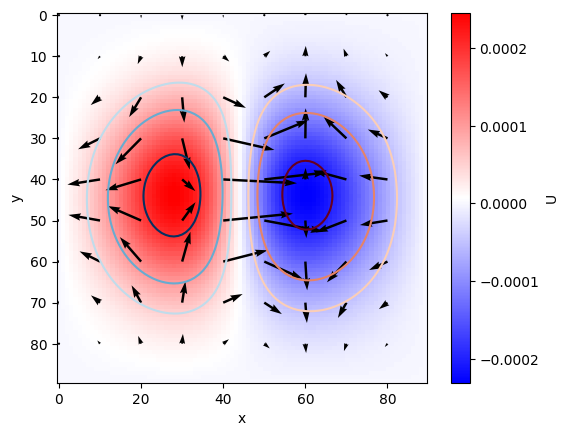

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def dipole(Niter, N):
  U = np.zeros((N,N))
  U[N//2, 4*N//9] = 1
  U[N//2, 5*N//9] = -1
  for n in range(Niter):
    for i in range(1, N-1):
      for j in range(1, N-1):
        U[i,j] = 0.25*(U[i-1,j]+U[i+1,j]+U[i,j-1]+U[i,j+1])
  return U

N = 90
Niter = 250
U = dipole(Niter, N)
[dY, dX] = np.gradient(U)
X, Y = np.meshgrid(np.arange(0, 90, 10), np.arange(0, 90, 10))

print(np.max(U), np.min(U))

plt.imshow(U, cmap='bwr')
plt.colorbar(label='U')
plt.quiver(X, Y, -1*dX[::10, ::10], -1*dY[::10, ::10])
plt.contour(U, cmap='RdBu', levels=[-0.0002, -0.0001, -0.00005, 0.00005, 0.0001, 0.0002])
plt.xlabel('x')
plt.ylabel('y')
plt.show()


## Frozen Turkey Cooking

Time to cook inside of turkey with radius 15.0: 69.0 time steps


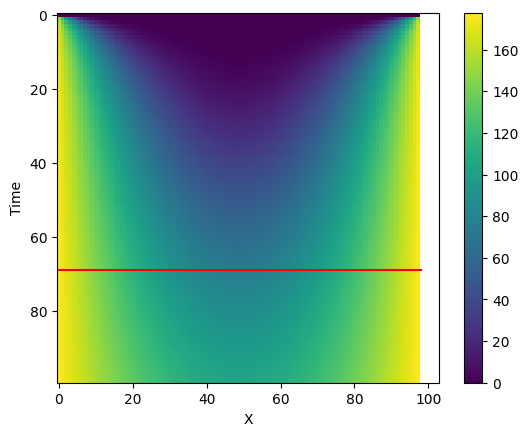

In [ ]:
def heat(R, Nt, t_update, Dr, Dt):
  kappa, sph, rho = 1, 1, 1
  T = np.zeros((N,2))
  Tpl = np.zeros((N,Nt//t_update+1))

  T[0,0] = 180
  T[-1,0] = 180
  eta = kappa/(sph*rho)*Dt/(Dr**2)
  m = 2

  for t in range(1,Nt):
    for ix in range(1, R-1):
      T[ix,1] = T[ix,0] + eta*(T[ix+1,0] + T[ix-1,0] - 2*T[ix,0])
    if t%t_update == 0:
      for ix in range(1, R-1):
        Tpl[ix, m] = T[ix, 1]
      m+=1
    for ix in range(1, R-1):
      T[ix, 0] = T[ix, 1]
  x = list(range(1,R-1))
  y = list(range(1,Nt//t_update+1))
  X, Y = np.meshgrid(x,y)
  def fZ(Tpl):
    z = Tpl[X,Y]
    return z
  return fZ(Tpl)

R = 100
Dr, Dt = 0.3, 0.01
t_update = 100
Z = heat(R, 10000, t_update, Dr, Dt)
print("Time to cook inside of turkey with radius {}: {} time steps".format((R//2)*Dr, (np.argmax(Z[:,N//2]>=74))*Dt*t_update))
plt.imshow(Z)
plt.colorbar()
plt.plot(np.arange(0, R-1),[(np.argmax(Z[:,N//2]>=74))]*(R-1), 'r')
plt.ylabel("Time")
plt.xlabel("X")
plt.show()


## 2D Square Well with Pole:

Below, I have plotted the first 9 wavefunctions of a 2d square well with a pole in the middle using an eigenfunction solver.

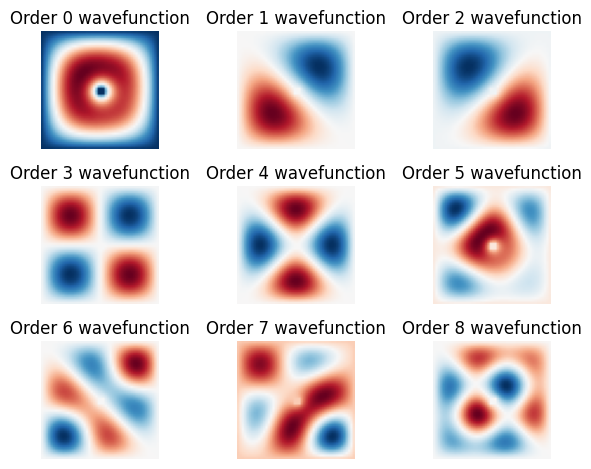

In [120]:
from scipy.linalg import eigh

def TwoDWell(N):
  H = np.eye(N**2)
  H *= -4
  h = 0.1

  V = np.zeros((N,N))
  V[0,:] = 100
  V[:,0] = 100
  V[N-1,:] = 100
  V[:,N-1] = 100
  V[N//2-1:N//2+2, N//2-1:N//2+2] = 10000
  V = V.flatten()

  for i in range(1,N**2):
    if i % N == 0: continue
    H[i-1, i] = 1
    H[i, i-1] = 1
  for j in range(N**2-N):
    H[j+N, j] = 1
    H[j, j+N] = 1
  for vn in range(N**2):
    H[vn,vn] -= h**2*V[vn]
  return -(H/h**2)

eval,vec=np.linalg.eigh(TwoDWell(50))


for i in range(9):
  ax = plt.subplot(3, 3, i+1)
  ax.set_title("Order {} wavefunction".format(i))
  ax.imshow(np.reshape(vec[:,i]+eval[i], (50,50,1)), cmap='RdBu')
  ax.set_axis_off()

plt.tight_layout()
plt.show()
# plt.plot(np.reshape(vec[:, 0]+eval[0], (50,50,1)))
# plt.plot(vec[:, 1::10]+eval[1::10])
